# 푸리에 급수

## Basis and orthorgonality

서로 수직(orthogonal)이고 크기가 1인 기저(basis) $x_1, x_2, \cdots x_n$를 가지고 있는 n차원 벡터 $A$를 생각해봅시다. 이 벡터는 다음처럼 쓸 수 있습니다.
$$ A=a_1 x_1 + a_2 x_2 + \cdots a_n x_n. $$  

여기에서 $a_k$는 $x_k$방향으로 향하고 있는 벡터 $A$의 "크기"를 나타낸다고 생각할 수 있습니다. 그러므로 구체적으로 다음처럼 내적을 통해 $c_k$를 구할 수 있습니다.

$$ A \cdot x_k = (a_1 x_1 + a_2 x_2 + \cdots a_n x_n) \cdot x_k \\
= a_k x_k \cdot x_k = a_k.$$

$k$가 아닌 기저는 수직이므로 모두 0이 되고 기저벡터의 크기를 1로 정해두었으므로 $x_k \cdot x_k=1$입니다.

## 합에서 적분으로

다음처럼 주어지는 두 벡터 $A$과 $B$의 내적을 생각해봅시다. 
$$ A = (a_1 x_1 + a_2 x_2 + \cdots a_n x_n), \\ 
B = (b_1 x_1 + b_2 x_2 + \cdots b_n x_n), $$
우선 여기에서는 $a_i$, $b_i$는 모두 실수로 가정합시다. 

$$ A \cdot B = (a_1 x_1 + a_2 x_2 + \cdots a_n x_n) \cdot (b_1 x_1 + b_2 x_2 + \cdots b_n x_n) \\ 
= (a_1 b_1 x_1^2 + a_2 b_2 x_2^2 + \cdots a_n b_n x_n^2) = \sum_i a_i b_i  $$

이제 함수 $f(x)$를 벡터처럼 생각해보자. 즉 연속적인 함수 $f(x)$를 잘게 쪼개어서 (편의상 $\Delta x =1$) 각 구간의 $x$값을 기저로 생각해보자. 그러면 다음처럼 쓸 수 있다.
$$ f(x) \approx f(0) x_0 + f(1) x_1 + f(2) x_2 + \cdots $$

그러면 두 함수의 내적을 다음처럼 쓸 수 있다.
$$  f(x) \cdot g(x) \leftrightarrow \langle f|g \rangle = \sum_x f(x) g(x) = \int f(x) g(x)  dx. $$
마지막 단계에서 (용기를 내어) 합을 적분으로 바꾸었다. 즉 적분이 함수의 내적에 해당한다.

## 푸리에 급수

푸리에 급수는 sin과 cos함수(혹은 exp 함수)를 이용해서 주기 함수를 표현하는 방법이다. 혹은 주기함수를 사인, 코사인 함수로 분해하는 방법이다. 주기가 2$\pi$인 함수 $f(t)$가 다음처럼 사인과 코사인의 결합으로 쓸 수 있다고 상상해보자.
$$ f(t) = A_1 \sin(nt) + A_2 \sin(2nt) + A_3 \sin(3nt) + \cdots \\ 
+ \frac{B_0}{2}+B_1 \cos(nt)+ B_2 \cos(2nt) + \cdots. $$

$\sin$, $\cos$을 기저(basis)처럼 생각하면 위에서 살펴보았던 벡터와 같은 형태임을 알 수 있다. 운 좋게도 삼각함수를 기저로 생각하면 위에서 가정했던 직교성을 훌륭하게 만족한다. 즉, 
$$ \int_0^{2 \pi} \sin(n t) \cos(m t) dt = 0$$
$$ \int_0^{2 \pi} \sin(n t) \sin(m t) dt = \pi \delta_{n,m}$$
$$ \int_0^{2 \pi} \cos(n t) \cos(m t) dt = \pi \delta_{n,m}$$

따라서 계수 $A_n, B_n$은 "매우" 쉽게 구할 수 있다.
$$ A_n = \frac{1}{\pi} \int_0^{2 \pi} f(t) \sin(nt) dt$$
$$ B_n = \frac{1}{\pi} \int_0^{2 \pi} f(t) \cos(nt) dt$$

예를 들어 주기가 $\pi$이고 진폭이 1인 사각파를 생각해보자.

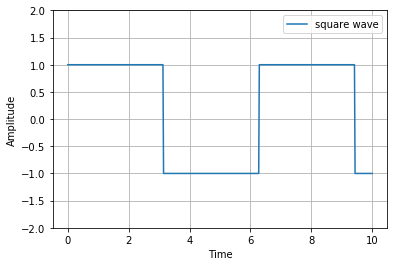

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
 
x = np.linspace(0, 10, 500)
plt.plot(x, signal.square(x),label='square wave');

plt.xlabel('Time')b
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.ylim(-2, 2)
plt.show()

이 함수 $F(t)$는 $0<t<\pi$에서는 1, $\pi<t<2\pi$ 에서는 -1입니다. (용기를 내어) 이 함수를 다양한 주기의 사인과 코사인의 함수를 조합해서 표현할 수 있지 않을까 상상해봅시다. 이 함수는 원점대칭(기함수)이므로 cos은 포함하지 않을 것입니다. 그러므로 다음처럼 사인함수의 조합으로 써봅시다.
$$ f(t) = \sum_n a_n \sin (n t)$$

위에서 구한 식을 이용하면 $a_n$은 매우 쉽게 구할 수 있으며 짝수에서는 0, 홀수에서는 $\frac{4}{n \pi}$이다. 따라서 
$$ f(t)= \frac{4}{\pi}\sum_{n=1,3,5,\cdots} \frac{1}{n} \sin (nx). $$

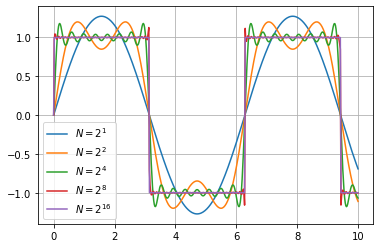

In [9]:
def f(x,n):
    i, s = 1, 0
    while (i<=n):
        s = s + 4/np.pi/i*np.sin(i*x)
        i = i+2
    return s

x=np.linspace(0,10,500)
plt.plot(x,f(x,1),label="$N=2^1$")
plt.plot(x,f(x,2**2),label="$N=2^2$")
plt.plot(x,f(x,2**4),label="$N=2^4$")
plt.plot(x,f(x,2**8),label="$N=2^8$")
plt.plot(x,f(x,2**16),label="$N=2^{16}$")

plt.grid()
plt.legend();